In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import husl
from legendgram import legendgram
import mapclassify
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.colors import ListedColormap
from random import shuffle
from tqdm import tqdm

In [2]:
clusters = pd.read_csv('/Users/martin/Dropbox/Academia/Data/Geo/Prague/Clustering/complete data/200218_clusters_complete_n20.csv', index_col=0)

In [3]:
file = '/Users/martin/Dropbox/Academia/Contracts/UAP Prague/2020.01_Zakázka MF/01_data/202004_Zakazka MF_predana data/20200421_ZakazkaMF_data_validacni.gdb'

In [4]:
import fiona
fiona.listlayers(file)

['URK_LokalityStav_p', 'URK_SS_VyuzitiZakl_p', 'VyvojZastavby_p']

In [5]:
qual = gpd.read_file(file, layer='URK_LokalityStav_p')

In [6]:
buildings = gpd.read_file('/Users/martin/Dropbox/Academia/Data/Geo/Prague/Clustering/geometry.gpkg', layer='buildings')

In [7]:
buildings['cent'] = buildings.centroid
buildings = buildings.set_geometry('cent')

In [8]:
buildings = buildings.to_crs(qual.crs)

In [9]:
joined = gpd.sjoin(buildings, qual, how='left')

In [10]:
joined = joined.merge(clusters, how='left', on='uID')

In [11]:
joined.head(2)

,uID,geometry,cent,index_right,ID,CISLO_TXT,NAZEV_STAV,ZASTAVENOST,VYUZITI_STAV,STRUKTURA_STAV,MIRA_STABILITY_STAV,TYP_MESTA,KRAJINA,Shape_Length,Shape_Area,cluster
0,0,"POLYGON ((-749844.585 -1052277.805, -749844.41...",POINT (-749841.681 -1052279.951),233,16170,617,Cementárna Radotín,1,2,8,5,1.0,1,2815.203269,239855.665606,1.0
1,1,"POLYGON ((-744449.580 -1042702.590, -744447.15...",POINT (-744432.289 -1042699.409),702,10080,008,Malá Strana,1,1,1,4,1.0,1,5419.046731,692062.403477,11.0


In [11]:
joined = joined.set_geometry('geometry')

## analyse

In [14]:
import numpy as np

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 0.02
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

pal = cols

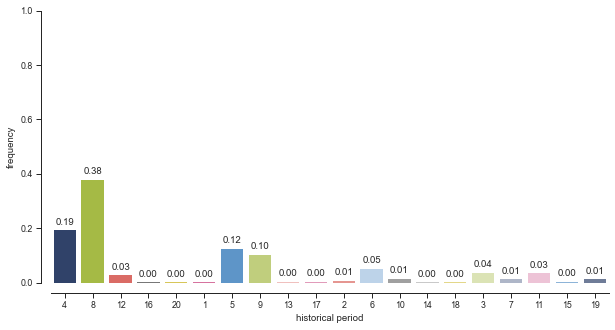

In [53]:
data = joined.loc[joined['cluster'].isin()]['STRUKTURA_STAV'].value_counts(sort=False, normalize=True)

sns.set(context="paper", style="ticks", rc={'patch.force_edgecolor': False})
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(ax=ax, x=data.index, y=data, order=data.index, palette=pal)
sns.despine(offset=10)
plt.ylabel('frequency')
plt.xlabel('historical period')
plt.ylim(0, 1)
show_values_on_bars(ax)

In [14]:
sample = joined.loc[joined['STRUKTURA_STAV'].isin([1, 2, 5, 6, 7, 8, 9])]

In [ ]:
data = sample.loc[sample['cluster'].isin([11])]['STRUKTURA_STAV'].value_counts(sort=False, normalize=True)

labels = ['organic', 'perimeter block', 'village', 'garden city', 'modernism', 'production', 'services']
sns.set(context="paper", style="ticks", rc={'patch.force_edgecolor': False})
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(ax=ax, x=data.index, y=data, order=[1, 2, 5, 6, 7, 8, 9], palette=pal)
sns.despine(offset=10)
plt.ylabel('frequency')
plt.xlabel('qualitative typology')
plt.ylim(0, 1)
ax.set_xticklabels(labels)
show_values_on_bars(ax)

In [ ]:
# save all clusters
for cl in range(20):
    data = sample.loc[sample['cluster'].isin([cl])]['STRUKTURA_STAV'].value_counts(sort=False, normalize=True)

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(ax=ax, x=data.index, y=data, order=[1, 2, 5, 6, 7, 8, 9], palette=pal)
    sns.despine(offset=10)
    plt.ylabel('frequency')
    plt.xlabel('qualitative typology')
    plt.ylim(0, 1)
    ax.set_xticklabels(labels)
    show_values_on_bars(ax)
    for ext in ['pdf', 'png']:
        plt.savefig('figures/PRG_cluster_' + str(cl) + '_structure.' + ext, bbox_inches='tight')
    plt.close()

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

data = sample.loc[sample['cluster'].isin([11])]['STRUKTURA_STAV'].value_counts(sort=False, normalize=True)

sns.barplot(ax=ax[0, 0], x=data.index, y=data, order=[1, 2, 5, 6, 7, 8, 9], palette=pal)
sns.despine(offset=10)
ax[0,0].set_ylabel('frequency')
ax[0,0].set_xlabel('qualitative typology')
ax[0,0].set_title('cluster 11')
ax[0,0].set_ylim(0, 1)
ax[0,0].set_xticklabels(labels)
show_values_on_bars(ax[0, 0])

data = sample.loc[sample['cluster'].isin([5])]['STRUKTURA_STAV'].value_counts(sort=False, normalize=True)
sns.barplot(ax=ax[0, 1], x=data.index, y=data, order=[1, 2, 5, 6, 7, 8, 9], palette=pal)
sns.despine(offset=10)
ax[0,1].set_ylabel('frequency')
ax[0,1].set_xlabel('qualitative typology')
ax[0,1].set_title('cluster 5')
ax[0,1].set_ylim(0, 1)
ax[0,1].set_xticklabels(labels)
show_values_on_bars(ax[0, 1])

data = sample.loc[sample['cluster'].isin([12])]['STRUKTURA_STAV'].value_counts(sort=False, normalize=True)
sns.barplot(ax=ax[1, 0], x=data.index, y=data, order=[1, 2, 5, 6, 7, 8, 9], palette=pal)
sns.despine(offset=10)
ax[1,0].set_ylabel('frequency')
ax[1,0].set_xlabel('qualitative typology')
ax[1,0].set_title('cluster 12')
ax[1,0].set_ylim(0, 1)
ax[1,0].set_xticklabels(labels)
show_values_on_bars(ax[1, 0])

data = sample.loc[sample['cluster'].isin([13])]['STRUKTURA_STAV'].value_counts(sort=False, normalize=True)
sns.barplot(ax=ax[1, 1], x=data.index, y=data, order=[1, 2, 5, 6, 7, 8, 9], palette=pal)
sns.despine(offset=10)
ax[1,1].set_ylabel('frequency')
ax[1,1].set_xlabel('qualitative typology')
ax[1,1].set_title('cluster 13')
ax[1,1].set_ylim(0, 1)
ax[1,1].set_xticklabels(labels)
show_values_on_bars(ax[1, 1])

plt.tight_layout()
plt.savefig('figures/PRG_cluster_structure_subplot.pdf')

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

data = sample.loc[sample['cluster'].isin([11, 15, 5])]['STRUKTURA_STAV'].value_counts(sort=False, normalize=True)

sns.barplot(ax=ax[0, 0], x=data.index, y=data, order=[1, 2, 5, 6, 7, 8, 9], palette=pal)
sns.despine(offset=10)
ax[0,0].set_ylabel('frequency')
ax[0,0].set_xlabel('qualitative typology')
ax[0,0].set_title('compact city')
ax[0,0].set_ylim(0, 1)
ax[0,0].set_xticklabels(labels)
show_values_on_bars(ax[0, 0])

data = sample.loc[sample['cluster'].isin([3, 0, 8, 9, 13, 17])]['STRUKTURA_STAV'].value_counts(sort=False, normalize=True)
sns.barplot(ax=ax[0, 1], x=data.index, y=data, order=[1, 2, 5, 6, 7, 8, 9], palette=pal)
sns.despine(offset=10)
ax[0,1].set_ylabel('frequency')
ax[0,1].set_xlabel('qualitative typology')
ax[0,1].set_title('low-rise city')
ax[0,1].set_ylim(0, 1)
ax[0,1].set_xticklabels(labels)
show_values_on_bars(ax[0, 1])

data = sample.loc[sample['cluster'].isin([1, 19])]['STRUKTURA_STAV'].value_counts(sort=False, normalize=True)
sns.barplot(ax=ax[1, 0], x=data.index, y=data, order=[1, 2, 5, 6, 7, 8, 9], palette=pal)
sns.despine(offset=10)
ax[1,0].set_ylabel('frequency')
ax[1,0].set_xlabel('qualitative typology')
ax[1,0].set_title('industrial city')
ax[1,0].set_ylim(0, 1)
ax[1,0].set_xticklabels(labels)
show_values_on_bars(ax[1, 0])

data = sample.loc[sample['cluster'].isin([12, 14, 2, 10])]['STRUKTURA_STAV'].value_counts(sort=False, normalize=True)
sns.barplot(ax=ax[1, 1], x=data.index, y=data, order=[1, 2, 5, 6, 7, 8, 9], palette=pal)
sns.despine(offset=10)
ax[1,1].set_ylabel('frequency')
ax[1,1].set_xlabel('qualitative typology')
ax[1,1].set_title('heterogenous dense city branch')
ax[1,1].set_ylim(0, 1)
ax[1,1].set_xticklabels(labels)
show_values_on_bars(ax[1, 1])

plt.tight_layout()
plt.savefig('figures/PRG_branch_structure_subplot.pdf')

In [12]:
import scipy.stats as ss
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [15]:
cramers_v(sample.cluster, sample.STRUKTURA_STAV)

0.6741832153043661

In [16]:
confusion_matrix = pd.crosstab(sample.cluster, sample.STRUKTURA_STAV)
chi, p, dof, exp = ss.chi2_contingency(confusion_matrix)

In [20]:
p

0.0

In [21]:
dof

114

In [22]:
chi

325595.1995642433